# Demo for functional usage of CFG-explorer

Now, `cfg-explorer` can not only be used as a command line tool. We can also call it within a Python program.

## Download Spec CPU Benchmark 2006

Save the suite outside our current repository:

```
$ cd ..
$ git clone https://github.com/Multi2Sim/m2s-bench-spec2006
```

Every `.i386` file is a binary file for testing.

## Import Libraries

First, to import `cfg_explore` in this subdirectory, you should include your `cfg-explorer` path into your `PATH` environment variable. You can do this by (suppose the whole `cfg-explorer` directory is located in `$HOME/cfg-explorer`):

```
$ export PATH=$HOME/cfg-explorer:$PATH
```

Or import it in this notebook by such an approach for that the target folder is actually the parent folder of this file:

In [1]:
import os
import sys
from pathlib import Path

sys.path.insert(0,str(Path().resolve().parent))

##  Usages of `cfg_explore` Function

In [2]:
from cfgexplorer import cfg_explore

### Lanuch an interactive web app

Now, call `cfg_explore` with the only argument `binary`, which is the path of the bianry file we prepare to analysis. After running, it will host a website on http://127.0.0.1:5050/ to show the *control flow graph* of the file. You can specify the port by `port` parameter.

In [3]:
cfg_explore(binary='../../m2s-bench-spec2006/999.specrand/specrand_base.i386')

WARNING | 2020-07-26 08:02:08,727 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
100% |###################################| Elapsed Time: 0:00:00 Time:  0:00:00


 * Serving Flask app "cfgexplorer.explorer" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


INFO    | 2020-07-26 08:02:08,912 | werkzeug |  * Running on http://127.0.0.1:5050/ (Press CTRL+C to quit)


Whenever you want to shut down the app, just interrupt the function. For example, in this notebook, click on <kbd>interrupt the kernel</kbd>buttom on the toolbar.

### Export raw `.dot` files

In [4]:
cfg_explore(binary='../../m2s-bench-spec2006/999.specrand/specrand_base.i386',output='test.dot')

WARNING | 2020-07-26 08:02:20,678 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
100% |###################################| Elapsed Time: 0:00:00 Time:  0:00:00


`.dot` file can be converted to image format, for example, if you have installed `graphviz` in your machine, try this command:

In [5]:
!dot test.dot -Tpng -o test.png

![](test.png)

### Export `.svg` files

You can also specify the `output` argument with `.svg` suffix, and you will get the same graph as what you see in the web app without `output` [before](#Lanuch-an-interactive-web-app)

In [6]:
cfg_explore(binary='../../m2s-bench-spec2006/999.specrand/specrand_base.i386',output='./test.svg')

WARNING | 2020-07-26 08:02:44,514 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
100% |###################################| Elapsed Time: 0:00:00 Time:  0:00:00


`.svg` files can be opened by web-browser directly, it can also be displayed in this notebook:

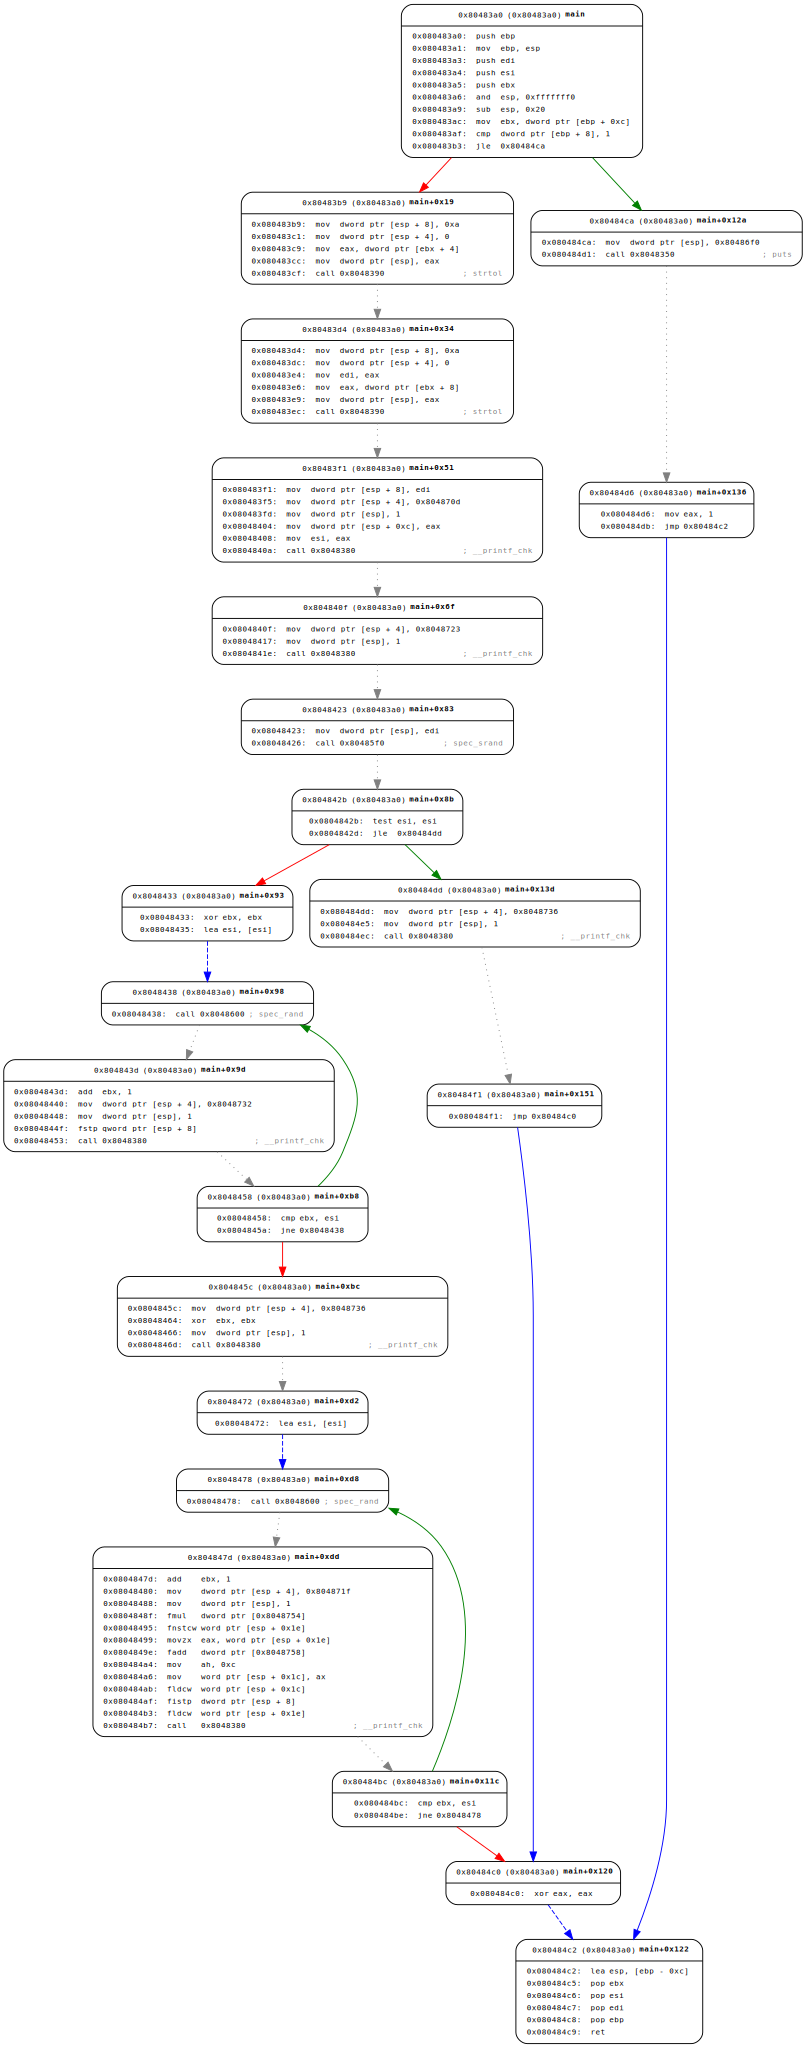

In [7]:
from IPython.core.display import SVG
display(SVG('test.svg'))

There are also many online tools available that convert `.svg` to other format files. Besides, if you have installed `inkscape`, you can use:

In [8]:
!inkscape test.svg --export-area-drawing --without-gui --export-pdf=test.pdf

/bin/bash: inkscape: command not found


And now, you can open [test.pdf](test.pdf) directly to view the *control flow graph*. It is what $\TeX$ exactly do when asked to insert a `.svg` image into an article by `\includegraphics{}`. It is to say that, if `inkscape`and $\TeX$ installed properly, this notebook can be converted to a pretty pdf by `nbconvert`, which is built-in Jupyter notebook server. 

### Traversal a large folder to generate all CFGs

We still use `m2s-bench-spec2006` as an example.

Assume that we need to analyze all binary files in this folder. Wrapping `cfg-explorer` as a function makes the task more flexible inside a Python script.

First, get all potential binary files for analysis:

In [9]:
from glob import glob
progs = sorted(glob('../../m2s-bench-spec2006/*/*.i386'))
progs

['../../m2s-bench-spec2006/401.bzip2/bzip2_base.i386',
 '../../m2s-bench-spec2006/403.gcc/gcc_base.i386',
 '../../m2s-bench-spec2006/410.bwaves/bwaves_base.i386',
 '../../m2s-bench-spec2006/416.gamess/gamess_base.i386',
 '../../m2s-bench-spec2006/429.mcf/mcf_base.i386',
 '../../m2s-bench-spec2006/433.milc/milc_base.i386',
 '../../m2s-bench-spec2006/434.zeusmp/zeusmp_base.i386',
 '../../m2s-bench-spec2006/435.gromacs/gromacs_base.i386',
 '../../m2s-bench-spec2006/436.cactusADM/cactusADM_base.i386',
 '../../m2s-bench-spec2006/437.leslie3d/leslie3d_base.i386',
 '../../m2s-bench-spec2006/444.namd/namd_base.i386',
 '../../m2s-bench-spec2006/445.gobmk/gobmk_base.i386',
 '../../m2s-bench-spec2006/447.dealII/dealII_base.i386',
 '../../m2s-bench-spec2006/450.soplex/soplex_base.i386',
 '../../m2s-bench-spec2006/453.povray/povray_base.i386',
 '../../m2s-bench-spec2006/454.calculix/calculix_base.i386',
 '../../m2s-bench-spec2006/456.hmmer/hmmer_base.i386',
 '../../m2s-bench-spec2006/458.sjeng/sjen

In [10]:
# create a directory to store the outputs
out_dir = './output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

Then, we can simply call `cfg_explore` function inside loops. Keep it alone, we just need to wait for generating all '.svg' files.

**Note**: it might take a extremely long time. Be patient.

In [11]:
for p in progs:
    name = p.split('/')[3]
    print('start analysis of:',name)
    output_file = os.path.join(out_dir, name + '.svg')
    if not os.path.exists(output_file):
        cfg_explore(binary=p,output=output_file)

start analysis of: 401.bzip2
start analysis of: 403.gcc
start analysis of: 410.bwaves
start analysis of: 416.gamess
start analysis of: 429.mcf
start analysis of: 433.milc
start analysis of: 434.zeusmp
start analysis of: 435.gromacs
start analysis of: 436.cactusADM
start analysis of: 437.leslie3d
start analysis of: 444.namd
start analysis of: 445.gobmk
start analysis of: 447.dealII
start analysis of: 450.soplex
start analysis of: 453.povray
start analysis of: 454.calculix
start analysis of: 456.hmmer
start analysis of: 458.sjeng
start analysis of: 459.GemsFDTD
start analysis of: 462.libquantum
start analysis of: 464.h264ref
start analysis of: 465.tonto
start analysis of: 470.lbm
start analysis of: 471.omnetpp
start analysis of: 473.astar
start analysis of: 481.wrf
start analysis of: 482.sphinx3
start analysis of: 483.xalancbmk
start analysis of: 998.specrand
start analysis of: 999.specrand


Now, you can view all outputs in `out_dir`.

